In [1]:
from micecat_auto import *

In [8]:
#run_micecat_query(np.arange(241,400))

In [9]:
#run_micecat_auto_batch(1,0,istart=200)

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


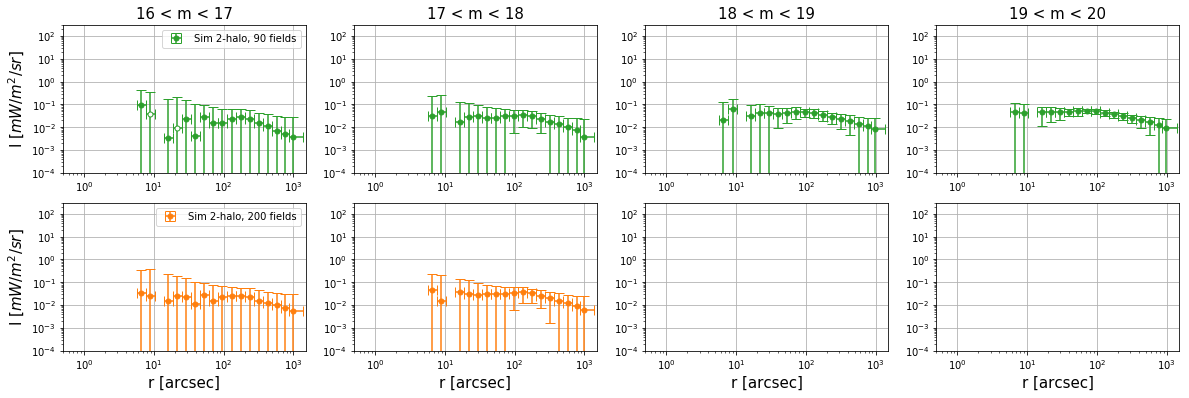

In [10]:
from utils import *
from micecat import *
from micecat_auto import *

for inst in [1]:
    fig, ax = plt.subplots(2, 4, figsize = (20,6))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

        rbins, mc_avg, mc_std, _ = get_micecat_sim_cen(inst, im, filt_order=0, sub=False)
        plot_err_log(rbins, 
                 mc_avg, mc_std,
                 ax=ax[0][im], color='C2',label='Sim 2-halo, 90 fields')
        
        rbins, mc_avg, mc_std, _ = get_micecat_sim_cen_auto(inst, im, filt_order=0, sub=False)
        plot_err_log(rbins, 
                 mc_avg, mc_std,
                 ax=ax[1][im], color='C1',label='Sim 2-halo, 200 fields')

        ax[0][im].set_ylim([1e-4,3e2])
        ax[0][im].set_xlim([5e-1,1.5e3])
        ax[0][im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[0][im].grid()    
        
        ax[1][im].set_ylim([1e-4,3e2])
        ax[1][im].set_xlim([5e-1,1.5e3])
        ax[1][im].grid()    
        ax[1][im].set_xlabel('r [arcsec]', fontsize=15)

    ax[0][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[0][0].legend(fontsize=10)
    ax[1][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[1][0].legend(fontsize=10)

fig.savefig('/Users/ytcheng/Desktop/morefields.png',
             dpi = 150, bbox_inches='tight')

In [1]:
run_micecat_batch(1,8, run_type='1h',  Nstack=100, Mhcut=1e14, R200cut=0, zcut=0.2)

MICECAT field 0, 0 < ra < 2, 0 < dec < 2
./micecat_data/onehalo_TM1_icat0_zcut0.20_R200cut0_Mhcut14.pkl
